In [6]:
import numpy
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import subplots
import random
import numpy as np

In [7]:
BASE = Path(os.getcwd()).joinpath("dataset")
#SHOW THE CLASSES
labels = os.listdir(BASE)
if "final_data" in labels:
    labels.remove("final_data")

print("   ---    Current labels     --- :\n",labels)

   ---    Current labels     --- :
 ['monster', 'nothing', 'trapo', 'wipes']


In [8]:
monster_samples = BASE / "monster"
nothing_samples = BASE / "no_monster"

# Creating dataset


In [9]:
dataset = []
for label in labels:
    samples = BASE / label
    files = os.listdir(samples)
    pre_list = []
    for elem in files:
        cur = samples.joinpath(elem)
        frame = mpimg.imread(cur)
        pre_list.append(np.array([frame,label]))

    dataset.extend(np.array(pre_list))
dataset = np.array(dataset)
np.random.shuffle(dataset)

print(dataset.shape)
# Saving the dataset.

OUT = BASE /"final_data"
print("THIS IS OUT",OUT)
if os.path.exists(OUT/"np_data.npy"): #Clear the directory
    print("REMOVING LAST DATASET")
    os.remove(OUT/"np_data.npy")

np.save(OUT/"np_data.npy",dataset,allow_pickle=True)

C:\Users\corlg\AppData\Local\Temp\ipykernel_10112\212170190.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pre_list.append(np.array([frame,label]))


(2110, 2)
THIS IS OUT c:\Users\corlg\git-local\computer_vision_tests\dataset\final_data
REMOVING LAST DATASET


# Showing sample

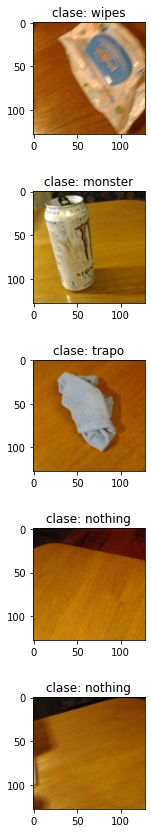

In [10]:

loaded_data = np.load(OUT/"np_data.npy",allow_pickle= True)

n_ejemplos = 5
fig, axs = subplots(nrows=n_ejemplos, figsize=(2,n_ejemplos*3))
for i in range(n_ejemplos):
    img,label = random.choice(loaded_data)
    axs[i].imshow(img)
    axs[i].set_title(f"clase: {label}")
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Users\\corlg\\git-local\\computer_vision_tests\\dataset\\no_monster'

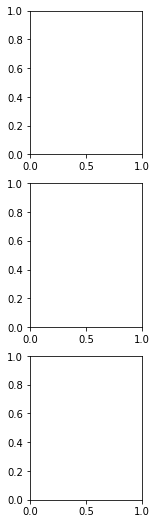

In [11]:


n_ejemplos = 3
fig, axs = subplots(nrows=n_ejemplos, figsize=(2,n_ejemplos*3))
for i in range(n_ejemplos):
    random_nothing = random.choice( os.listdir(nothing_samples))
    frame = mpimg.imread(nothing_samples.joinpath(random_nothing).__str__())
    axs[i].imshow(frame)
plt.show()